# ANÁLISE EXPLORATÓRIA DO AUMENTO DOS PREÇOS DA CESTA BÁSICA EM ANGOLA ENTRE 2008-2020

Este projecto de Analise de Dados, destina-se a analisar a crescente dos preços dos produtos da cesta básica ao longo dos anos 2005-2018.
Poderemos entender quais produtos sofreram maior aumento a nivel percentual, quais foram os mais produzidos e consumidos ao longo destes anos 


# CARREGANDO O CSV

In [605]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df = pd.read_csv ("cestabasica.csv")
df.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,35.2,0.4703
2,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Cassava flour,900 G,actual,Retail,AOA,139.03,1.8574
3,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Maize flour,900 G,actual,Retail,AOA,135.8,1.8143
4,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,"Rice (regular, milled)",900 G,actual,Retail,AOA,125.46,1.6762
5,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,milk and dairy,Milk (powder),50 Pounds,actual,Retail,AOA,1843.2,24.6253
6,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,miscellaneous food,Sugar (white),900 G,actual,Retail,AOA,117.42,1.5687
7,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (palm),L,actual,Retail,AOA,382.84,5.1148
8,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (soybean),L,actual,Retail,AOA,225.43,3.0118
9,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,35.8,0.4782


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1192 non-null   object
 1   admin1     1135 non-null   object
 2   admin2     1135 non-null   object
 3   market     1192 non-null   object
 4   latitude   1135 non-null   object
 5   longitude  1135 non-null   object
 6   category   1192 non-null   object
 7   commodity  1192 non-null   object
 8   unit       1192 non-null   object
 9   priceflag  1192 non-null   object
 10  pricetype  1192 non-null   object
 11  currency   1192 non-null   object
 12  price      1192 non-null   object
 13  usdprice   1192 non-null   object
dtypes: object(14)
memory usage: 130.5+ KB


# Criando uma cópia do CSV

In [573]:
df1 = df.copy()

In [577]:
df1 = df1.iloc[1:]

In [579]:
df1.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,35.2,0.4703
2,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Cassava flour,900 G,actual,Retail,AOA,139.03,1.8574
3,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Maize flour,900 G,actual,Retail,AOA,135.8,1.8143
4,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,"Rice (regular, milled)",900 G,actual,Retail,AOA,125.46,1.6762
5,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,milk and dairy,Milk (powder),50 Pounds,actual,Retail,AOA,1843.2,24.6253
6,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,miscellaneous food,Sugar (white),900 G,actual,Retail,AOA,117.42,1.5687
7,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (palm),L,actual,Retail,AOA,382.84,5.1148
8,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (soybean),L,actual,Retail,AOA,225.43,3.0118
9,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,35.8,0.4782
10,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Cassava flour,900 G,actual,Retail,AOA,142.97,1.9098


In [581]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 1 to 1191
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1191 non-null   object
 1   admin1     1134 non-null   object
 2   admin2     1134 non-null   object
 3   market     1191 non-null   object
 4   latitude   1134 non-null   object
 5   longitude  1134 non-null   object
 6   category   1191 non-null   object
 7   commodity  1191 non-null   object
 8   unit       1191 non-null   object
 9   priceflag  1191 non-null   object
 10  pricetype  1191 non-null   object
 11  currency   1191 non-null   object
 12  price      1191 non-null   object
 13  usdprice   1191 non-null   object
dtypes: object(14)
memory usage: 130.4+ KB


# CONVERSÃO DAS COLUNAS PARA FORMATOS ADEQUADOS

In [583]:
df1['price'] = df1['price'].astype(float)
df1['usdprice'] = df1['usdprice'].astype(float)
df1['longitude'] = df1['longitude'].astype(float)
df1['latitude'] = df1['latitude'].astype(float)
df1['admin1'] = df1['admin1'].astype(str)
df1['admin2'] = df1['admin2'].astype(str)
df1['market'] = df1['market'].astype(str)
df1['category'] = df1['category'].astype(str)
df1['commodity'] = df1['commodity'].astype(str)
df1['unit'] = df1['unit'].astype(str)
df1['priceflag'] = df1['priceflag'].astype(str)
df1['pricetype'] = df1['pricetype'].astype(str)
df1['currency'] = df1['currency'].astype(str)
df1['date'] = pd.to_datetime(df1['date'])


In [270]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 1 to 1191
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1191 non-null   datetime64[ns]
 1   admin1     1191 non-null   object        
 2   admin2     1191 non-null   object        
 3   market     1191 non-null   object        
 4   latitude   1134 non-null   float64       
 5   longitude  1134 non-null   float64       
 6   category   1191 non-null   object        
 7   commodity  1191 non-null   object        
 8   unit       1191 non-null   object        
 9   priceflag  1191 non-null   object        
 10  pricetype  1191 non-null   object        
 11  currency   1191 non-null   object        
 12  price      1191 non-null   float64       
 13  usdprice   1191 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 130.4+ KB


In [585]:
df1.isnull().sum()

date          0
admin1        0
admin2        0
market        0
latitude     57
longitude    57
category      0
commodity     0
unit          0
priceflag     0
pricetype     0
currency      0
price         0
usdprice      0
dtype: int64

# TRATAMENTO DE CAMPOS NULL

In [587]:
lat = df1['latitude'].mode()[0]
print (lat)
df1['latitude'] = df1['latitude'].fillna(lat)
long = df1['longitude'].mode()[0]
print (long)
df1['longitude'] = df1['longitude'].fillna(long)

df1.info()

-8.838
13.234
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 1 to 1191
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1191 non-null   datetime64[ns]
 1   admin1     1191 non-null   object        
 2   admin2     1191 non-null   object        
 3   market     1191 non-null   object        
 4   latitude   1191 non-null   float64       
 5   longitude  1191 non-null   float64       
 6   category   1191 non-null   object        
 7   commodity  1191 non-null   object        
 8   unit       1191 non-null   object        
 9   priceflag  1191 non-null   object        
 10  pricetype  1191 non-null   object        
 11  currency   1191 non-null   object        
 12  price      1191 non-null   float64       
 13  usdprice   1191 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 130.4+ KB


In [278]:
df1.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

# ANALISE UNIVARIAVEL

Text(0.5, 1.0, 'Histograma dos Mercados')

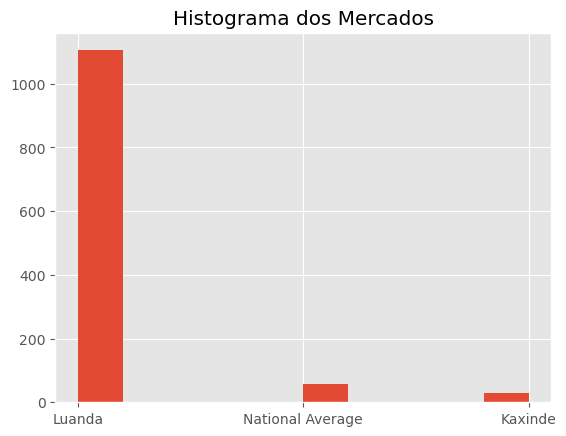

In [607]:
plt.hist(df1.market)
plt.title("Histograma dos Mercados")

Text(0.5, 1.0, 'Histograma das Categorias dos Produtos')

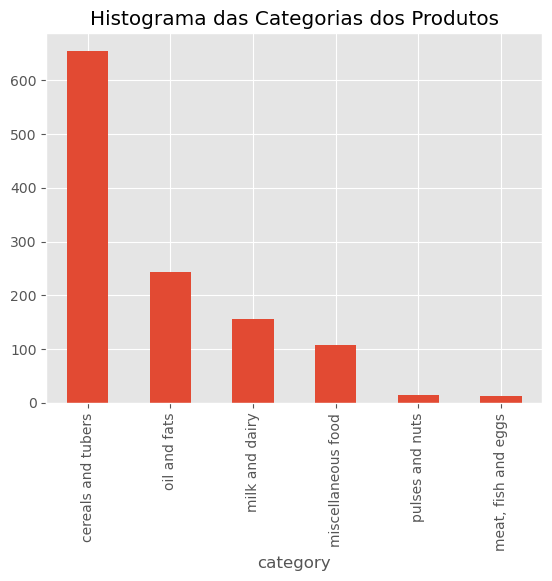

In [609]:
df1.category.value_counts().plot.bar()
plt.title("Histograma das Categorias dos Produtos")

Text(0.5, 1.0, 'Histograma dos Produtos')

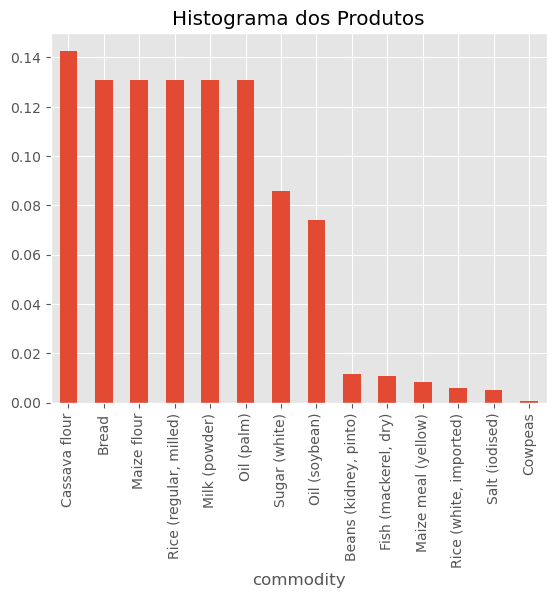

In [611]:
df1.commodity.value_counts(1).plot.bar()
plt.title("Histograma dos Produtos")

# ANALISE DO AUMENTO POR PRODUTO


<br>
<br>
<br>
<br> Começamos por calcular quantas vezes os produtos aparecem no DataFrame
<br>
<br>
<br>

In [286]:
df1.commodity.value_counts()

commodity
Cassava flour             170
Bread                     156
Maize flour               156
Rice (regular, milled)    156
Milk (powder)             156
Oil (palm)                156
Sugar (white)             102
Oil (soybean)              88
Beans (kidney, pinto)      14
Fish (mackerel, dry)       13
Maize meal (yellow)        10
Rice (white, imported)      7
Salt (iodised)              6
Cowpeas                     1
Name: count, dtype: int64

In [589]:
df1['date'] = pd.to_datetime(df1['date'])

In [591]:
prod1 ='Cassava flour'
Cassava= df1[df1['commodity']== prod1 ].copy()
Cassava['year'] = Cassava['date'].dt.year
Cassava.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
2,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Cassava flour,900 G,actual,Retail,AOA,139.03,1.8574,2008
10,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Cassava flour,900 G,actual,Retail,AOA,142.97,1.9098,2008
17,2008-03-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Cassava flour,900 G,actual,Retail,AOA,146.39,1.9506,2008
24,2008-04-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Cassava flour,900 G,actual,Retail,AOA,149.24,1.9936,2008
32,2008-05-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Cassava flour,900 G,actual,Retail,AOA,147.77,1.9753,2008


In [603]:
media_preco= Cassava.groupby('year')['price'].mean()

media_preco.head(20)

year
2008    149.183333
2009    166.070833
2010    193.708333
2011    247.730000
2012    275.760000
2013    312.730833
2014    329.184167
2015    349.798333
2016    222.811905
2017    462.541667
2018    433.261765
2019    603.665833
2020    728.939167
Name: price, dtype: float64

Text(0, 0.5, 'price')

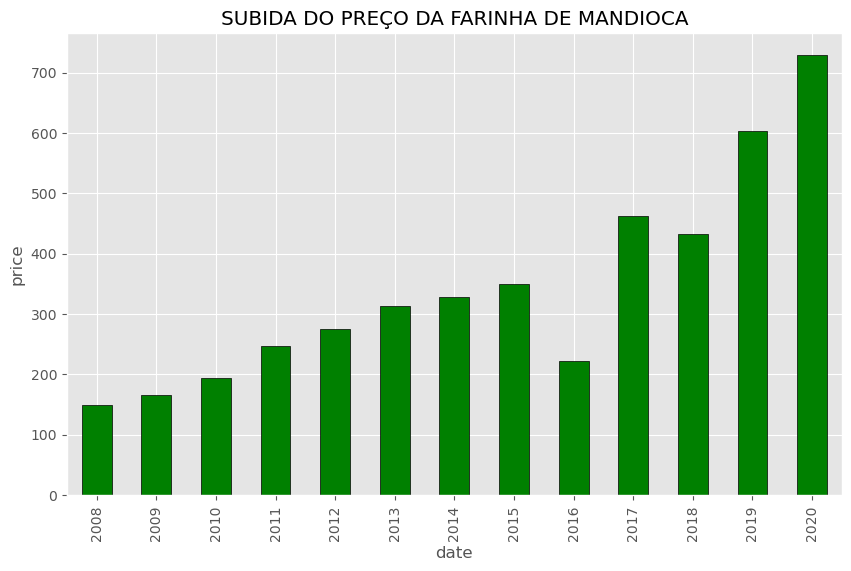

In [660]:
media_preco.plot.bar(figsize=(10, 6), color='green', edgecolor='black')
plt.title('SUBIDA DO PREÇO DA FARINHA DE MANDIOCA')
plt.xlabel('date')
plt.ylabel('price')


In [498]:
percf= media_preco.pct_change() * 100
percfuba=percf.sum()
print (percfuba,"%")

217.13763696196372 %


In [662]:

Bread= df1[df1['commodity'] == 'Bread'].copy()
Bread['year'] = Bread['date'].dt.year
Bread.head()



,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
1,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,35.20,0.4703,2008
9,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,35.80,0.4782,2008
16,2008-03-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,35.97,0.4793,2008
23,2008-04-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,36.02,0.4812,2008
31,2008-05-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Bread,Unit,actual,Retail,AOA,36.75,0.4912,2008


Text(0, 0.5, 'price')

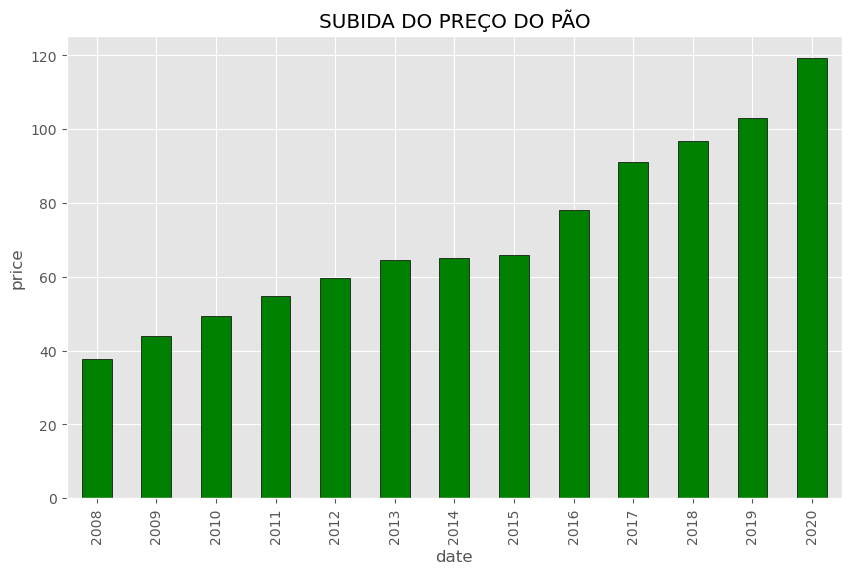

In [664]:
media_preco1= Bread.groupby('year')['price'].mean()

media_preco1.plot.bar(figsize=(10, 6), color='green', edgecolor='black')
plt.title('SUBIDA DO PREÇO DO PÃO')
plt.xlabel('date')
plt.ylabel('price')

In [494]:
percp= media_preco1.pct_change() * 100
percbread=percp.sum()
print (percbread,"%")

122.43611002249612 %


In [165]:
df.commodity.value_counts()

commodity
Cassava flour             170
Bread                     156
Maize flour               156
Rice (regular, milled)    156
Milk (powder)             156
Oil (palm)                156
Sugar (white)             102
Oil (soybean)              88
Beans (kidney, pinto)      14
Fish (mackerel, dry)       13
Maize meal (yellow)        10
Rice (white, imported)      7
Salt (iodised)              6
Cowpeas                     1
Name: count, dtype: int64

In [619]:
F_milho= df1[df1['commodity'] == 'Maize flour'].copy()
F_milho['year'] = F_milho['date'].dt.year
F_milho.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
3,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Maize flour,900 G,actual,Retail,AOA,135.80,1.8143,2008
11,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Maize flour,900 G,actual,Retail,AOA,140.70,1.8795,2008
18,2008-03-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Maize flour,900 G,actual,Retail,AOA,142.10,1.8934,2008
25,2008-04-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Maize flour,900 G,actual,Retail,AOA,146.63,1.9587,2008
33,2008-05-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,Maize flour,900 G,actual,Retail,AOA,147.91,1.9771,2008


Text(0, 0.5, 'price')

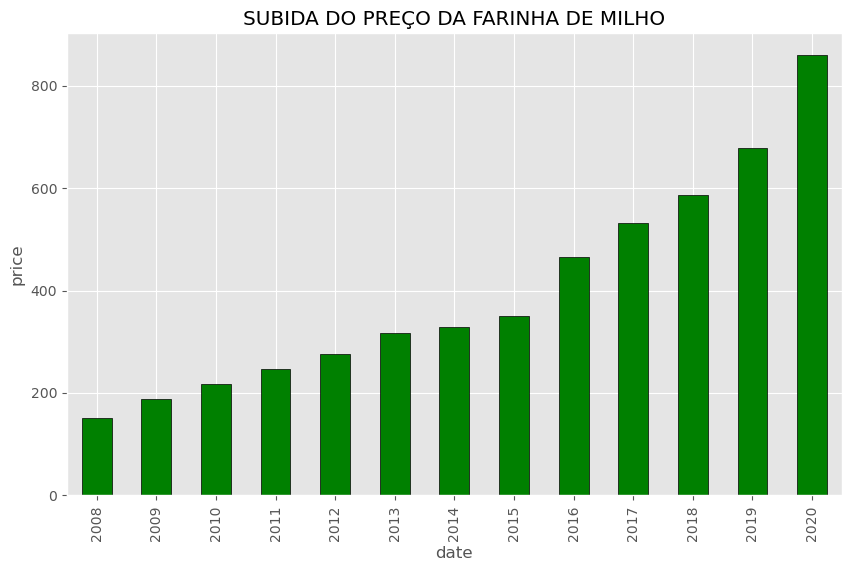

In [621]:
F_milho= F_milho.groupby('year')['price'].mean()
F_milho.plot.bar(figsize=(10, 6), color='green', edgecolor='black')
plt.title('SUBIDA DO PREÇO DA FARINHA DE MILHO')
plt.xlabel('date')
plt.ylabel('price')

In [625]:
percmi= F_milho.pct_change() * 100
percfmilh=percmi.sum()
print (percfmilh,"%")

189.78116814626088 %


In [631]:
Arroz= df1[df1['commodity'] == 'Rice (regular, milled)'].copy()
Arroz['year'] = Arroz['date'].dt.year
Arroz.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
4,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,"Rice (regular, milled)",900 G,actual,Retail,AOA,125.46,1.6762,2008
12,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,"Rice (regular, milled)",900 G,actual,Retail,AOA,129.75,1.7332,2008
19,2008-03-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,"Rice (regular, milled)",900 G,actual,Retail,AOA,130.72,1.7418,2008
26,2008-04-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,"Rice (regular, milled)",900 G,actual,Retail,AOA,132.03,1.7637,2008
34,2008-05-15,Luanda,Luanda,Luanda,-8.838,13.234,cereals and tubers,"Rice (regular, milled)",900 G,actual,Retail,AOA,134.45,1.7972,2008


Text(0, 0.5, 'price')

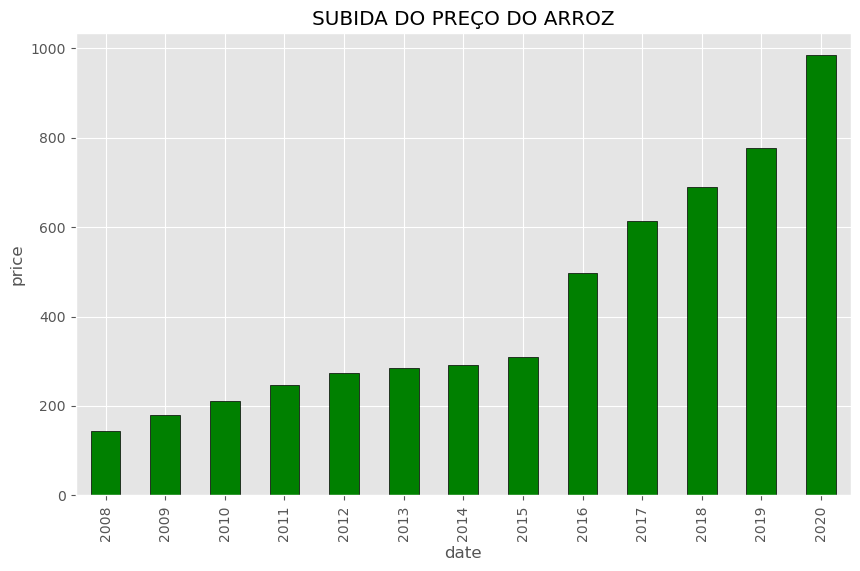

In [633]:
Arroz= Arroz.groupby('year')['price'].mean()
Arroz.plot.bar(figsize=(10, 6), color='green', edgecolor='black')
plt.title('SUBIDA DO PREÇO DO ARROZ')
plt.xlabel('date')
plt.ylabel('price')

In [514]:
percear= Arroz.pct_change()*100
percarro=percear.sum()
print (percarro,"%")

218.60590554458972 %


In [635]:
Leite= df1[df1['commodity'] == 'Milk (powder)'].copy()
Leite['year'] = Leite['date'].dt.year
Leite.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
5,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,milk and dairy,Milk (powder),50 Pounds,actual,Retail,AOA,1843.20,24.6253,2008
13,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,milk and dairy,Milk (powder),50 Pounds,actual,Retail,AOA,1893.10,25.2885,2008
20,2008-03-15,Luanda,Luanda,Luanda,-8.838,13.234,milk and dairy,Milk (powder),50 Pounds,actual,Retail,AOA,1904.48,25.3761,2008
27,2008-04-15,Luanda,Luanda,Luanda,-8.838,13.234,milk and dairy,Milk (powder),50 Pounds,actual,Retail,AOA,1916.83,25.6055,2008
35,2008-05-15,Luanda,Luanda,Luanda,-8.838,13.234,milk and dairy,Milk (powder),50 Pounds,actual,Retail,AOA,2000.71,26.7439,2008


Text(0, 0.5, 'price')

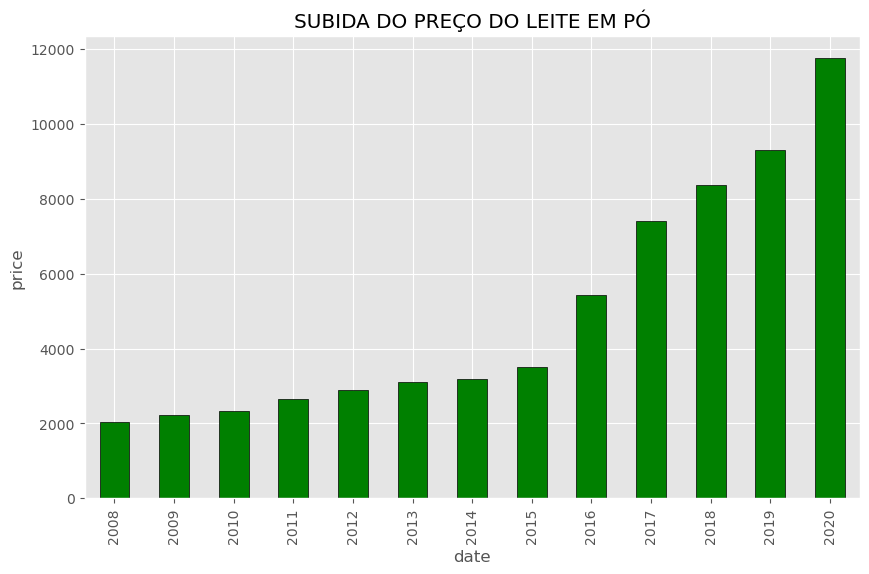

In [637]:
Leite= Leite.groupby('year')['price'].mean()
Leite.plot.bar(figsize=(10, 6), color='green', edgecolor='black')
plt.title('SUBIDA DO PREÇO DO LEITE EM PÓ')
plt.xlabel('date')
plt.ylabel('price')

In [522]:
percle= Leite.pct_change() * 100
percleit=percle.sum()
print (percleit,"%")

198.3577721796184 %


In [639]:
Oil= df1[df1['commodity'] == 'Oil (palm)'].copy()
Oil['year'] = Oil['date'].dt.year
Oil.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
7,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (palm),L,actual,Retail,AOA,382.84,5.1148,2008
15,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (palm),L,actual,Retail,AOA,383.97,5.1292,2008
22,2008-03-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (palm),L,actual,Retail,AOA,385.10,5.1312,2008
29,2008-04-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (palm),L,actual,Retail,AOA,386.48,5.1627,2008
36,2008-05-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (palm),L,actual,Retail,AOA,388.80,5.1972,2008


Text(0, 0.5, 'price')

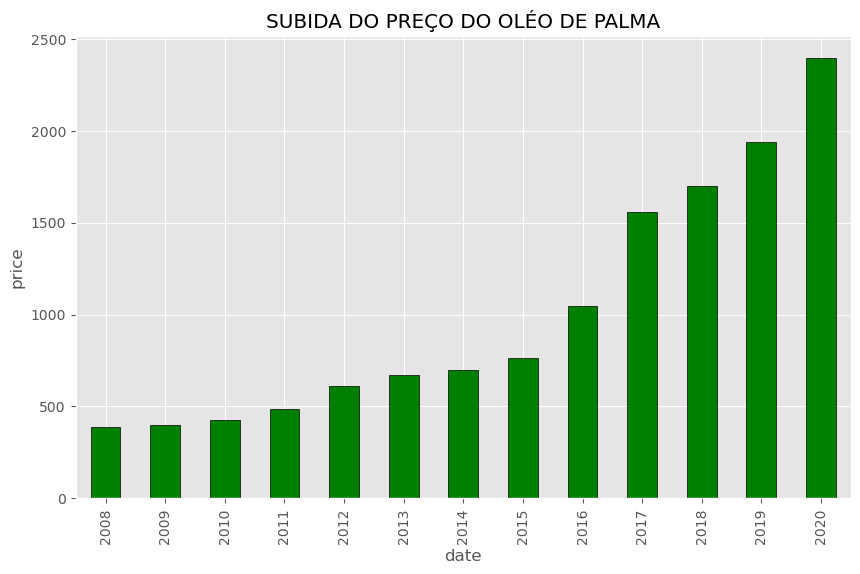

In [641]:
Oil1= Oil.groupby('year')['price'].mean()
Oil1.plot.bar(figsize=(10, 6), color='green', edgecolor='black')
plt.title('SUBIDA DO PREÇO DO OLÉO DE PALMA')
plt.xlabel('date')
plt.ylabel('price')

In [538]:
percpa= Oil1.pct_change() * 100
percpalma=percpa.sum()
print (percpalma,"%")

204.8333965566938 %


In [643]:
Acucar= df1[df1['commodity'] == 'Sugar (white)'].copy()
Acucar['year'] = Acucar['date'].dt.year
Acucar.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
6,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,miscellaneous food,Sugar (white),900 G,actual,Retail,AOA,117.42,1.5687,2008
14,2008-02-15,Luanda,Luanda,Luanda,-8.838,13.234,miscellaneous food,Sugar (white),900 G,actual,Retail,AOA,119.60,1.5976,2008
21,2008-03-15,Luanda,Luanda,Luanda,-8.838,13.234,miscellaneous food,Sugar (white),900 G,actual,Retail,AOA,120.09,1.6001,2008
28,2008-04-15,Luanda,Luanda,Luanda,-8.838,13.234,miscellaneous food,Sugar (white),900 G,actual,Retail,AOA,121.07,1.6173,2008
61,2008-09-15,Luanda,Luanda,Luanda,-8.838,13.234,miscellaneous food,Sugar (white),900 G,actual,Retail,AOA,130.30,1.7410,2008


Text(0, 0.5, 'price')

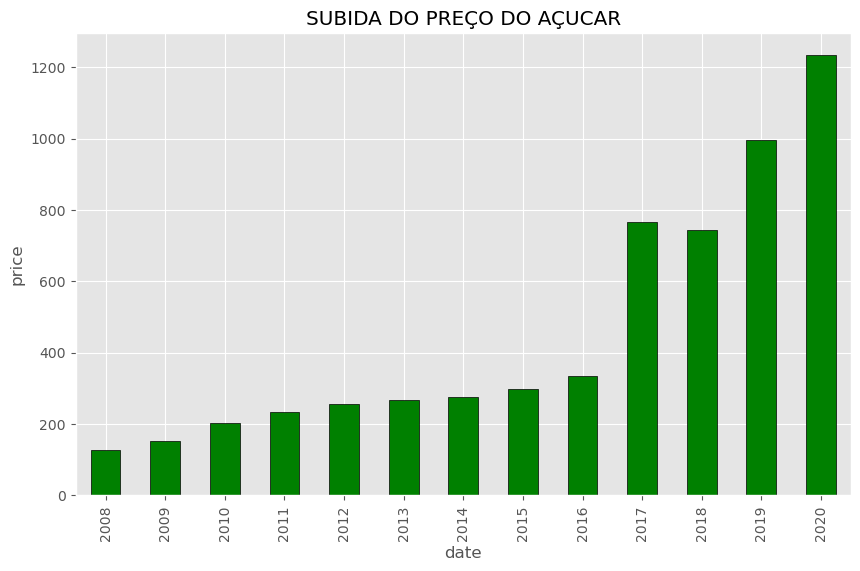

In [645]:
Acucar1= Acucar.groupby('year')['price'].mean()
Acucar1.plot.bar(figsize=(10, 6), color='green', edgecolor='black')
plt.title('SUBIDA DO PREÇO DO AÇUCAR')
plt.xlabel('date')
plt.ylabel('price')

In [547]:
perceac= Acucar1.pct_change() * 100
percacu=perceac.sum()
print (percacu,"%")

289.6632081186737 %


In [647]:
Oilc= df1[df1['commodity'] == 'Oil (soybean)'].copy()
Oilc['year'] = Oilc['date'].dt.year
Oilc.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
8,2008-01-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (soybean),L,actual,Retail,AOA,225.43,3.0118,2008
30,2008-04-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (soybean),L,actual,Retail,AOA,231.07,3.0867,2008
55,2008-08-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (soybean),L,actual,Retail,AOA,237.54,3.1672,2008
63,2008-09-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (soybean),L,actual,Retail,AOA,237.54,3.1740,2008
70,2008-10-15,Luanda,Luanda,Luanda,-8.838,13.234,oil and fats,Oil (soybean),L,actual,Retail,AOA,237.29,3.1830,2008


Text(0, 0.5, 'price')

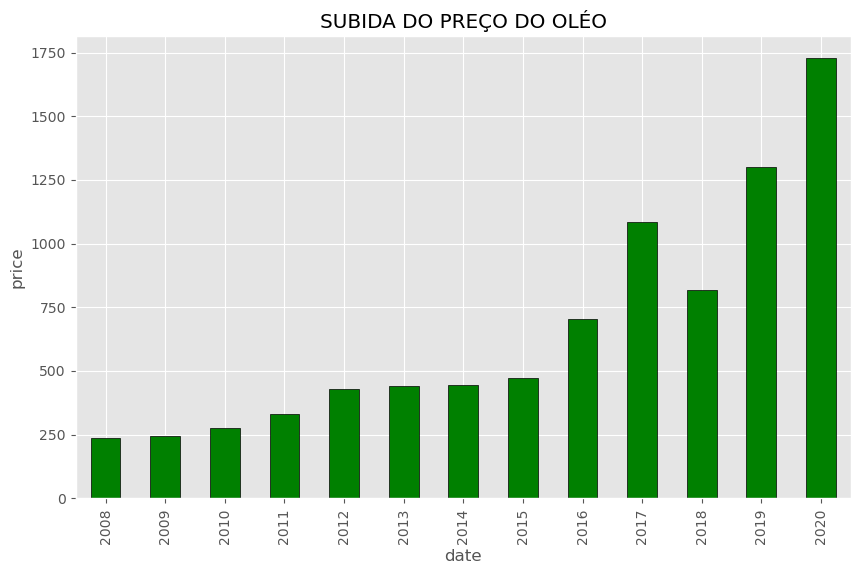

In [649]:
Oilcoz= Oilc.groupby('year')['price'].mean()

Oilcoz.plot.bar(figsize=(10, 6), color='green', edgecolor='black')
plt.title("SUBIDA DO PREÇO DO OLÉO")
plt.xlabel('date')
plt.ylabel('price')

In [551]:
perceoil= Oilcoz.pct_change() * 100
perceoleo=perceoil.sum()
print (perceoleo,"%")

246.98173832041084 %


<br>Cassava flour             170
<br>Bread                     156
<br>F               156
<br>Rice (regular, milled)    156
<br>Milk (powder)             156
<br>Oil (palm)                156
<br>Sugar (white)             102
<br>Oil (soybean)              88



In [651]:
cresc= {
'Produto':['Fuba de Mandioca',  'Pão', 'Fuba de Milho', 'Arroz', 'Leite em Pó', 'Oleo de Palma','Açucar','Oleo'],
'Porcentagem':[percfuba,percbread,percfmilh,percarro,percleit,percpalma,percacu,perceoleo]   
}
dfcre = pd.DataFrame(cresc)
dfcre.head(10)

,Produto,Porcentagem
0,Fuba de Mandioca,217.137637
1,Pão,122.436110
2,Fuba de Milho,189.781168
3,Arroz,218.605906
4,Leite em Pó,198.357772
5,Oleo de Palma,204.833397
6,Açucar,289.663208
7,Oleo,246.981738


Text(0, 0.5, 'PORCENTAGEM')

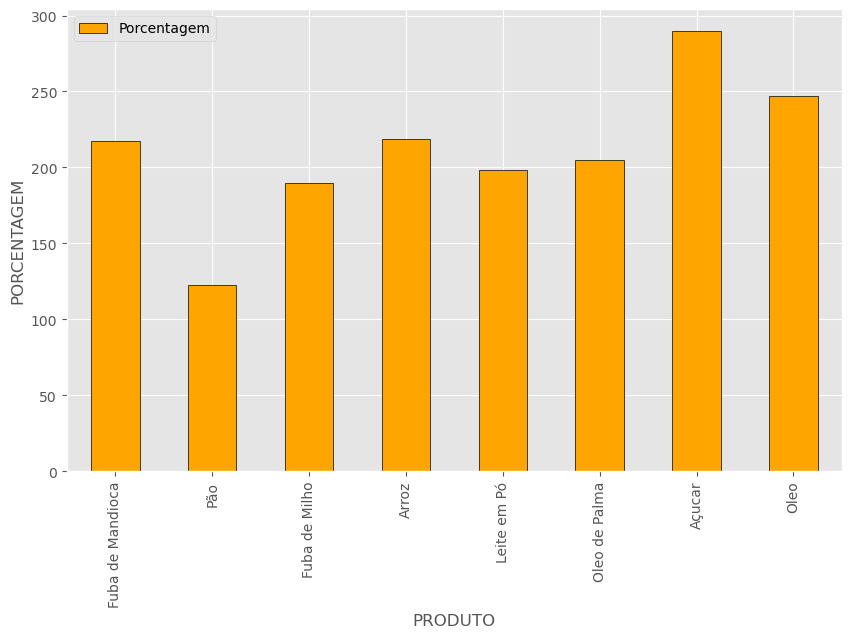

In [653]:
dfcre.plot.bar(x='Produto', y='Porcentagem', figsize=(10, 6), color='orange', edgecolor='black')
plt.xlabel('PRODUTO')
plt.ylabel('PORCENTAGEM')